# 1.实现高斯噪声

In [1]:
import numpy as np
import random
import cv2

In [2]:
def GaussianNoise(img,mean,sigma,percentage):
    NoiseImg = img
    count = int(percentage * img.shape[0] * img.shape[1])
    for i in range(count):
        ranx = random.randint(0, img.shape[0] - 1)
        rany = random.randint(0, img.shape[1] - 1)
        
        NoiseImg[ranx, rany] = NoiseImg[ranx, rany] + random.gauss(mean, sigma)
        if NoiseImg[ranx, rany] < 0:
            NoiseImg[ranx, rany] = 0
        elif NoiseImg[ranx, rany] > 255:
            NoiseImg[ranx, rany] = 255
            
    return NoiseImg

Text(0.5, 1.0, '高斯噪声')

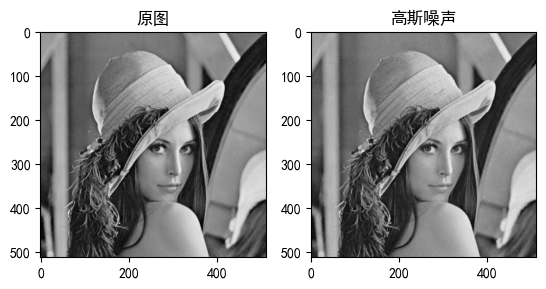

In [5]:
img = cv2.imread("lenna.png", 0)
img1 = GaussianNoise(img,2,4,0.8)
img = cv2.imread("lenna.png")
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

%matplotlib inline 
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False
plt.subplot(1,2,1)
plt.imshow(img2, cmap='gray')
plt.title("原图")

plt.subplot(1,2,2)
plt.imshow(img1, cmap='gray')
plt.title("高斯噪声")

# 2.实现椒盐噪声

In [6]:
def  fun1(img,percentage):     
    NoiseImg=img    
    count=int(percentage*img.shape[0]*img.shape[1])    
    for i in range(count): 
        randX=random.randint(0,img.shape[0]-1)       
        randY=random.randint(0,img.shape[1]-1)   
        
        if random.random()<=0.5:           
            NoiseImg[randX,randY]=0       
        else:            
            NoiseImg[randX,randY]=255    
    return NoiseImg

Text(0.5, 1.0, '椒盐噪声')

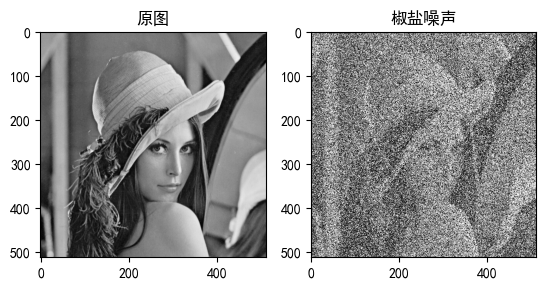

In [7]:
img = cv2.imread("lenna.png", 0)
img1=fun1(img,0.8)
img = cv2.imread("lenna.png")
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

%matplotlib inline 
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False
plt.subplot(1,2,1)
plt.imshow(img2, cmap='gray')
plt.title("原图")

plt.subplot(1,2,2)
plt.imshow(img1, cmap='gray')
plt.title("椒盐噪声")

# 3.实现PCA

In [8]:
import numpy as np
class PCA():
    def __init__(self,n_components):
        self.n_components = n_components
    
    def fit_transform(self,X):
        self.n_features_ = X.shape[1]
        # 求协方差矩阵
        X = X - X.mean(axis=0)
        self.covariance = np.dot(X.T,X)/X.shape[0]
        # 求协方差矩阵的特征值和特征向量
        eig_vals,eig_vectors = np.linalg.eig(self.covariance)
        # 获得降序排列特征值的序号
        idx = np.argsort(-eig_vals)
        # 降维矩阵
        self.components_ = eig_vectors[:,idx[:self.n_components]]
        # 对X进行降维
        return np.dot(X,self.components_)
 
# 调用
pca = PCA(n_components=2)
X = np.array([[-1,2,66,-1], [-2,6,58,-1], [-3,8,45,-2], [1,9,36,1], [2,10,62,1], [3,5,83,2]])  #导入数据，维度为4
newX=pca.fit_transform(X)
print(newX)       

[[  7.96504337  -4.12166867]
 [ -0.43650137  -2.07052079]
 [-13.63653266  -1.86686164]
 [-22.28361821   2.32219188]
 [  3.47849303   3.95193502]
 [ 24.91311585   1.78492421]]


# 4.证明中心化协方差矩阵公式

Text(0.5, 1.0, '证明')

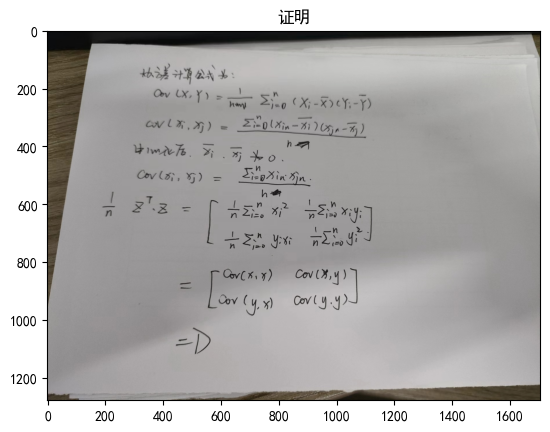

In [11]:
img = cv2.imread("1.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title("证明")